In [16]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.patches as mpatches

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

In [2]:
raw_data_path = '..\\data\\raw\\'
processed_data_path = '..\\data\\processed\\'

os.listdir(raw_data_path)

['.gitkeep', 'competition_data_price.csv']

In [3]:
path = raw_data_path + "competition_data_price.csv"
df_data = pd.read_csv(path, index_col =0)

df_data.head()

battery_power bluetooth  clock_speed dual_sim  front_camera four_g  \
0            842        no          2.2       no             1     no   
1           1021       yes          0.5      yes             0    yes   
2            563       yes          0.5      yes             2    yes   
3            615       yes          2.5       no             0     no   
4           1821       yes          1.2       no            13    yes   

   internal_memory  mobile_depth  mobile_weight  n_cores  ...  px_width   ram  \
0                7           0.6            188        2  ...       756  2549   
1               53           0.7            136        3  ...      1988  2631   
2               41           0.9            145        5  ...      1716  2603   
3               10           0.8            131        6  ...      1786  2769   
4               44           0.6            141        2  ...      1212  1411   

   screen_height  screen_width  talk_time  three_g  touch_screen wifi  \
0              9             7         19       no            no  yes   
1             17             3          7      yes           yes   no   
2             11             2          9      yes           yes   no   
3             16             8         11      yes            no   no   
4              8             2         15      yes           yes   no   

  price_range  price  
0      medium  350.0  
1        high  658.0  
2        high  705.0  
3        high  748.0  
4      medium  257.0  

[5 rows x 22 columns]

In [4]:
# to binary

df_data['bluetooth'] = pd.Series(np.where(df_data.bluetooth.values == 'yes', 1, 0), df_data.index)
df_data['dual_sim'] = pd.Series(np.where(df_data.dual_sim.values == 'yes', 1, 0), df_data.index)
df_data['four_g'] = pd.Series(np.where(df_data.four_g.values == 'yes', 1, 0), df_data.index)
df_data['three_g'] = pd.Series(np.where(df_data.three_g.values == 'yes', 1, 0), df_data.index)
df_data['touch_screen'] = pd.Series(np.where(df_data.touch_screen.values == 'yes', 1, 0), df_data.index)
df_data['wifi'] = pd.Series(np.where(df_data.wifi.values == 'yes', 1, 0), df_data.index)


values, classes = pd.factorize(df_data['price_range'])
df_data['price_range'] = values

In [5]:
df_data.head()

battery_power  bluetooth  clock_speed  dual_sim  front_camera  four_g  \
0            842          0          2.2         0             1       0   
1           1021          1          0.5         1             0       1   
2            563          1          0.5         1             2       1   
3            615          1          2.5         0             0       0   
4           1821          1          1.2         0            13       1   

   internal_memory  mobile_depth  mobile_weight  n_cores  ...  px_width   ram  \
0                7           0.6            188        2  ...       756  2549   
1               53           0.7            136        3  ...      1988  2631   
2               41           0.9            145        5  ...      1716  2603   
3               10           0.8            131        6  ...      1786  2769   
4               44           0.6            141        2  ...      1212  1411   

   screen_height  screen_width  talk_time  three_g  touch_screen  wifi  \
0              9             7         19        0             0     1   
1             17             3          7        1             1     0   
2             11             2          9        1             1     0   
3             16             8         11        1             0     0   
4              8             2         15        1             1     0   

   price_range  price  
0            0  350.0  
1            1  658.0  
2            1  705.0  
3            1  748.0  
4            0  257.0  

[5 rows x 22 columns]

In [6]:
df_data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       'four_g', 'internal_memory', 'mobile_depth', 'mobile_weight', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'price'],
      dtype='object')

In [7]:
classes

Index(['medium', 'high', 'very high', 'lower'], dtype='object')

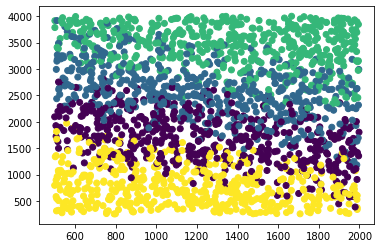

In [8]:
plt.scatter(df_data['px_width'], df_data['ram'], c=df_data['price_range'])

In [9]:
from sklearn.manifold import TSNE
X = df_data.drop(['price_range', 'price'], axis=1).values
embedding_tsne = TSNE(n_components=2).fit_transform(X)
embedding_tsne.shape

(2000, 2)

In [10]:
# True labels legend
colors = sn.color_palette("Paired")
num_classes = len(set(classes))

class_colours = [colors[x] for x in range(num_classes)]
labels_fac = list(classes)


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))

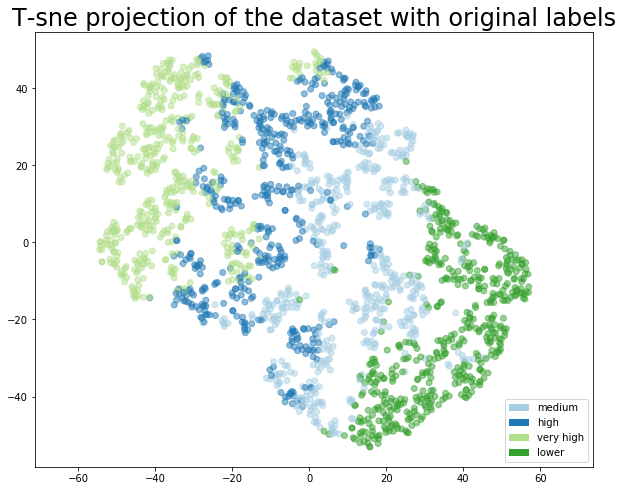

In [17]:
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], 
            c=[colors[x] for x in df_data['price_range']], 
            alpha = 0.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(recs,classes,loc=4)
plt.title('T-sne projection of the dataset with original labels', fontsize=24);

#### Check distrbution of classes

In [12]:
# sure..
unique, counts = np.unique(df_data['price_range'], return_counts=True)
dict(zip(unique, counts))

{0: 500, 1: 500, 2: 500, 3: 500}

In [13]:
# check for mising values
df_data.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
internal_memory    0
mobile_depth       0
mobile_weight      0
n_cores            0
primary_camera     0
px_height          0
px_width           0
ram                0
screen_height      0
screen_width       0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
price              0
dtype: int64

In [14]:
len(df_data.columns)

22

In [15]:
df_data.to_csv(processed_data_path + "smartphone_processed.csv")